In [2]:
# Import the required libraries
import pandas as pd
from pathlib import Path
import hvplot.pandas
import os
import numpy as np
import seaborn as sns
%matplotlib inline


In [3]:
#Read the CSV file containing economic time series data and slide data from '2019-01-01' to '2024-01-01'
start_date = '2019-01-01'
end_date = '2024-01-01'
inflation_forward_5_year_data = pd.read_csv('./Resources/5-year-forward-inflation-rate.csv')
inflation_forward_5_year_data=inflation_forward_5_year_data[(inflation_forward_5_year_data['date']<end_date)& (inflation_forward_5_year_data['date']>=start_date)]
inflation_forward_5_year_data.set_index('date',inplace=True)
inflation_forward_5_year_data.index=pd.to_datetime(inflation_forward_5_year_data.index)

treasury_bond_rate_10_year_yield = pd.read_csv('./Resources/10-year-treasury-bond-rate-yield.csv')
treasury_bond_rate_10_year_yield=treasury_bond_rate_10_year_yield[(treasury_bond_rate_10_year_yield['date']<end_date)& (treasury_bond_rate_10_year_yield['date']>=start_date)]
treasury_bond_rate_10_year_yield.set_index('date',inplace=True)
treasury_bond_rate_10_year_yield.index=pd.to_datetime(treasury_bond_rate_10_year_yield.index)

fed_funds_rate = pd.read_csv('./Resources/fed-funds-rate-historical.csv')
fed_funds_rate=fed_funds_rate[(fed_funds_rate['date']<end_date)& (fed_funds_rate['date']>=start_date)]
fed_funds_rate.set_index('date',inplace=True)
fed_funds_rate.index=pd.to_datetime(fed_funds_rate.index)

fixed_mortgage_30_year_rate = pd.read_csv('./Resources/30-year-fixed-mortgage-rate.csv')
fixed_mortgage_30_year_rate=fixed_mortgage_30_year_rate[(fixed_mortgage_30_year_rate['date']<end_date)& (fixed_mortgage_30_year_rate['date']>=start_date)]
fixed_mortgage_30_year_rate.set_index('date',inplace=True)
fixed_mortgage_30_year_rate.index=pd.to_datetime(fixed_mortgage_30_year_rate.index)

CPI = pd.read_csv('./Resources/Consumer_Price_Index_for_All_Urban.csv', delimiter=',')
CPI.rename(columns={'DATE':'date'},inplace=True)
CPI =CPI[(CPI['date']<end_date)& (CPI['date']>=start_date)]
CPI.set_index('date',inplace=True)
CPI.index=pd.to_datetime(CPI.index)

us_unemployment_rate = pd.read_csv('./Resources/us-national-unemployment-rate.csv')
us_unemployment_rate=us_unemployment_rate[(us_unemployment_rate['date']<end_date)& (us_unemployment_rate['date']>=start_date)]
us_unemployment_rate.set_index('date',inplace=True)
us_unemployment_rate.index=pd.to_datetime(us_unemployment_rate.index)

# Concat daily interest and inflation data
interest_inflation_portfolio = pd.concat([treasury_bond_rate_10_year_yield, fed_funds_rate, inflation_forward_5_year_data],axis=1, join='inner')
interest_inflation_portfolio.columns=['Treasury_10_year','Fed_funds','Inflation']
#display(interest_inflation_portfolio)

# Concat monthly mortgage interest, cpi and unemployment rate data
mortgage_cpi_unemployment_portfolio = pd.concat([fixed_mortgage_30_year_rate, CPI, us_unemployment_rate],axis=1, join='inner')
mortgage_cpi_unemployment_portfolio.columns=['Mortgage_rate','CPI','us_unemployment_rate']
#display(mortgage_cpi_unemployment_portfolio)


In [ ]:
#Q1: How does the 10 Year treasury bond and Fed Funds interest rate with 5 year forward 
#inflation rate behave during 2019-2023? Are they correlated with each other?

In [4]:
#Get the basic statistic information from interest rates and inflation forward rates
interest_inflation_portfolio.describe()

,Treasury_10_year,Fed_funds,Inflation
count,1251.000000,1251.000000,1251.000000
mean,2.275092,1.860176,2.059760
std,1.177512,1.902381,0.285281
min,0.520000,0.040000,0.860000
25%,1.425000,0.090000,1.845000
50%,1.900000,1.550000,2.120000
75%,3.400000,3.080000,2.280000
max,4.980000,5.330000,2.670000


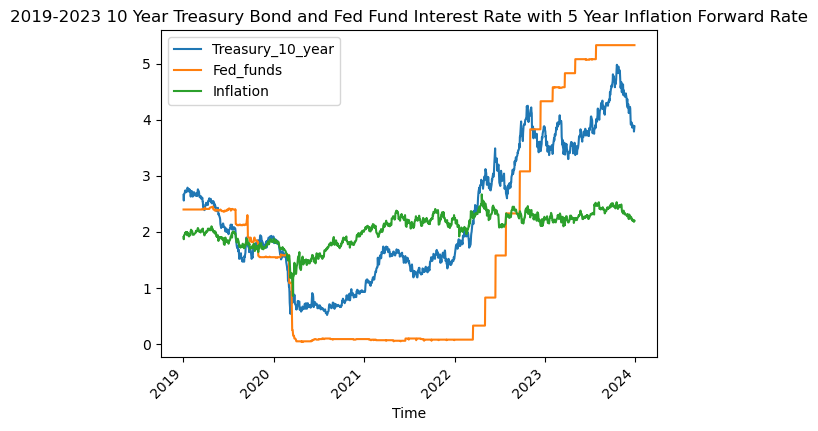

In [5]:
#Plot interest rates and inflation forward rates behavior within time line
ax=interest_inflation_portfolio.plot(
    rot=45,
    xlabel='Time',
    title='2019-2023 10 Year Treasury Bond and Fed Fund Interest Rate with 5 Year Inflation Forward Rate'
)

<Axes: >

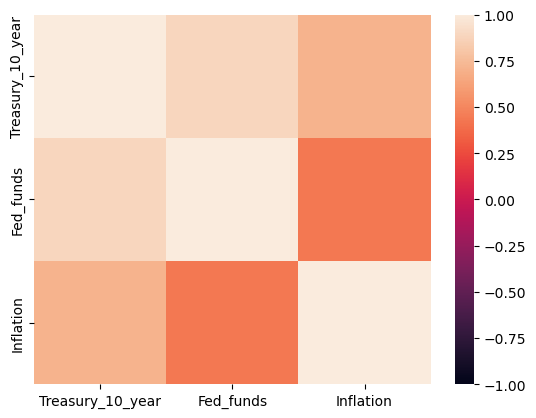

In [6]:
#Calculate the correlation between rates and inflation forward rate
intrate_correlation = interest_inflation_portfolio.corr()
sns.heatmap(intrate_correlation, vmin=-1, vmax=1)

<Axes: title={'center': 'Monthly Rates Change (%)'}, xlabel='Time'>

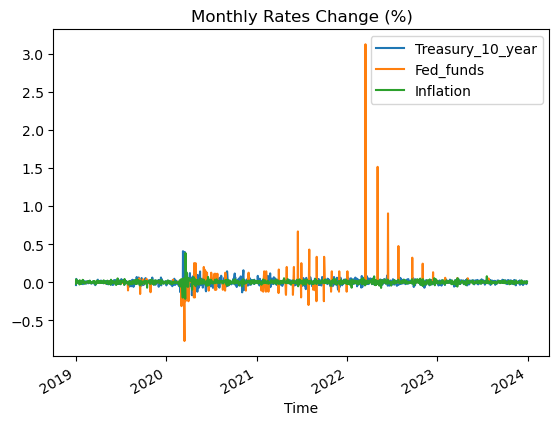

In [7]:
#Calculate and Plot the daily rates change
interest_rate_chg=interest_inflation_portfolio.pct_change()
interest_rate_chg.plot(
    xlabel='Time',
    title='Monthly Rates Change (%)'
)

<Axes: xlabel='Treasury_10_year', ylabel='Fed_funds'>

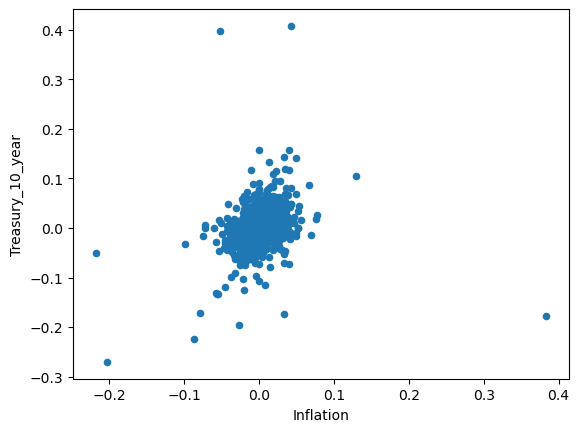

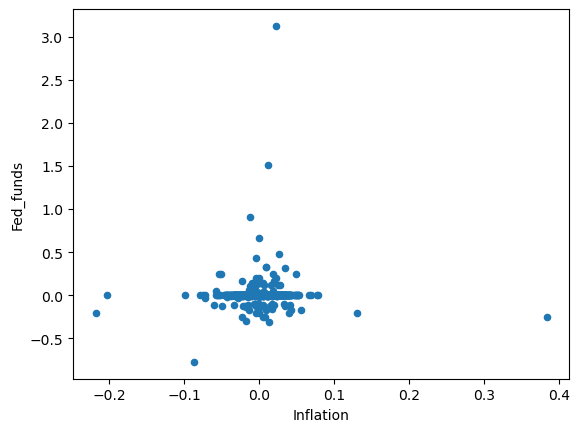

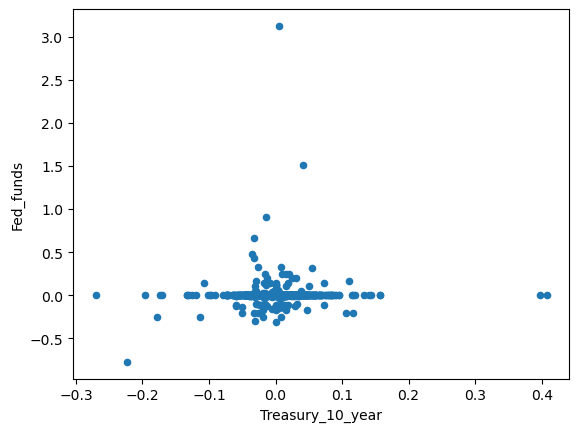

In [8]:
#Plot the relationship between interest rates and inflation forward rate change
interest_rate_chg.plot(kind='scatter', x='Inflation', y='Treasury_10_year')
interest_rate_chg.plot(kind='scatter', x='Inflation', y='Fed_funds')
interest_rate_chg.plot(kind='scatter', x='Treasury_10_year', y='Fed_funds')


In [ ]:
#Q2: How does 30 Year mortgage rate, cpi with us unemployment rate behave during 2019-2023?
#Are they correlated with each other?

In [9]:
#Get the basic statistic information from mortgage rate, cpi and us unemployment rate
mortgage_cpi_unemployment_portfolio.describe()

,Mortgage_rate,CPI,us_unemployment_rate
count,60.000000,60.000000,60.000000
mean,4.450000,276.559383,4.873333
std,1.585883,19.691781,2.379280
min,2.670000,252.718000,3.400000
25%,3.107500,258.239500,3.600000
50%,3.745000,271.161500,3.750000
75%,6.177500,296.901000,5.500000
max,7.790000,308.850000,14.700000


<Axes: title={'center': '2019-2023 30 Year Mortgage Rate with US Unemployment Rate'}, xlabel='Time'>

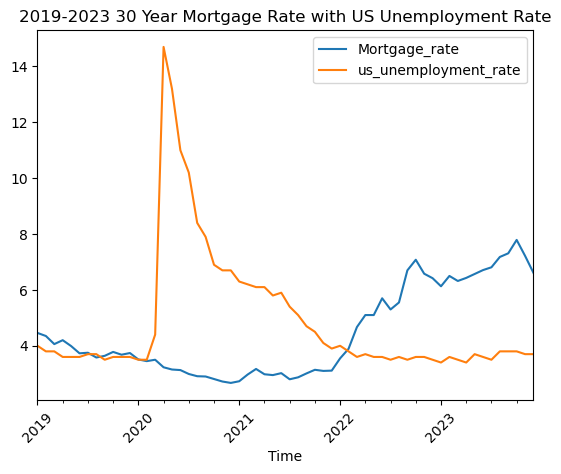

In [10]:
#Plot mortgage rate and us unemployment rates behavior within time line
mortgage_cpi_unemployment_portfolio.plot(
    rot=45,
    xlabel='Time',
    y=['Mortgage_rate', 'us_unemployment_rate'],
    title='2019-2023 30 Year Mortgage Rate with US Unemployment Rate'
)

<Axes: title={'center': '2019-2023 CPI rate'}, xlabel='Time'>

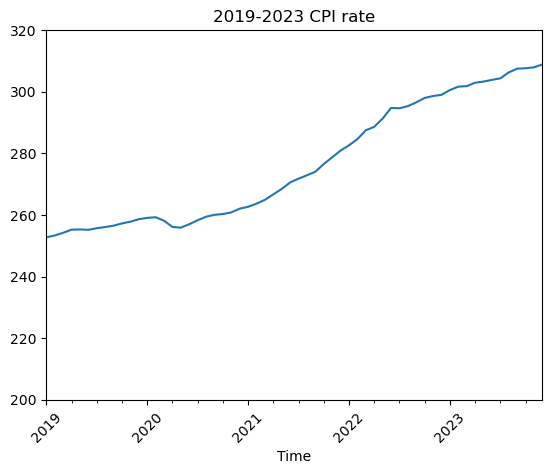

In [11]:
#Plot CPI behavior within time line
mortgage_cpi_unemployment_portfolio['CPI'].plot(
    rot=45,
    xlabel='Time',
    ylim=[200,320],
    title='2019-2023 CPI rate'
)

<Axes: title={'center': 'Monthly Rates Change (%)'}, xlabel='Time'>

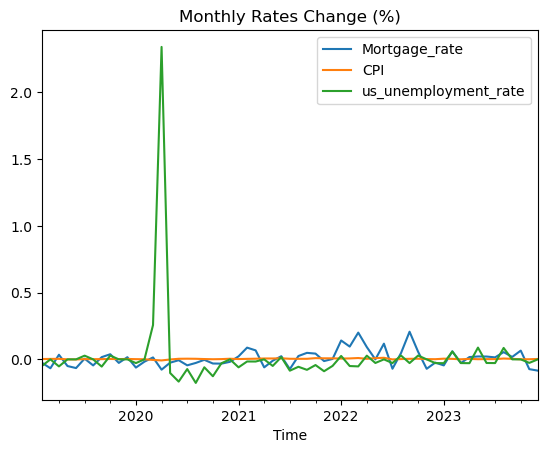

In [15]:
#Calculate and Plot the monthly rates change
rate_chg=mortgage_cpi_unemployment_portfolio.pct_change()
rate_chg=rate_chg.dropna()
rate_chg.plot(
    xlabel='Time',
    title='Monthly Rates Change (%)'
)

<Axes: xlabel='Mortgage_rate', ylabel='us_unemployment_rate'>

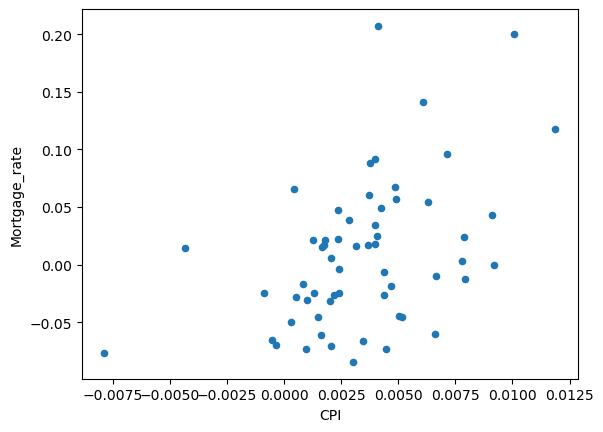

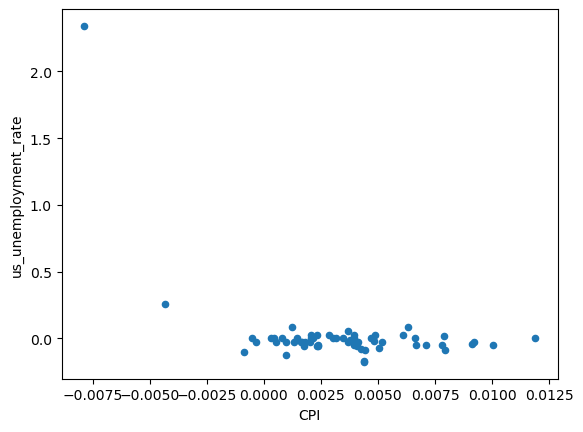

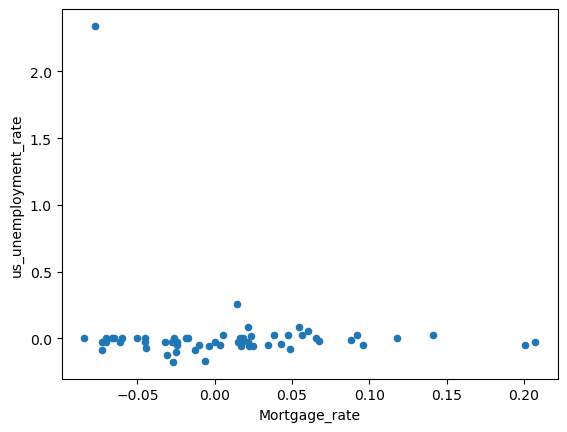

In [16]:
#Plot the relationship between interest rates monthly change and inflation forward rate monthly change 
rate_chg.plot(kind='scatter',x='CPI', y='Mortgage_rate')
rate_chg.plot(kind='scatter', x='CPI', y='us_unemployment_rate')
rate_chg.plot(kind='scatter', x='Mortgage_rate', y='us_unemployment_rate')

<Axes: >

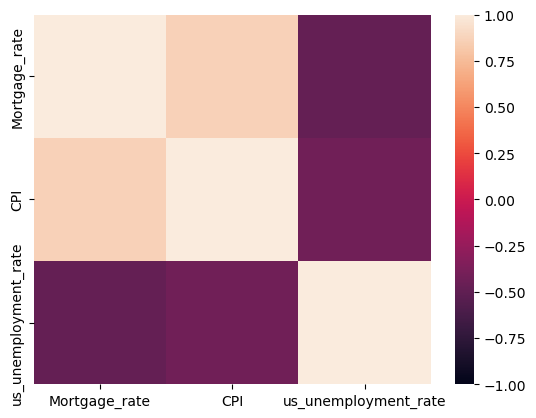

In [17]:
#Calculate the correlation between mortgage rate, cpi and unemployment rate
rate_correlation=mortgage_cpi_unemployment_portfolio.corr()
sns.heatmap(rate_correlation, vmin=-1, vmax=1)